# Table of contents
1. [Introduction](#introduction)
2. [Data preprocessing](#Data_preprocessing)
3. [Descriptive Statistics](#Data_exploration)
4. [Data Visualization](#Data_Visualization)<br>
    4.1 [Geographical plots](#spatial)<br>
    4.1 [Before and After the crisis](#before)




<h1><center><b>Asylum seekers and the refugee crisis in Greece</b></center></h1>
<h3><p><cite>Leandros Evangelidakis</cite> - July 2019</p></h3>


 <a id="introduction"></a>
 
 <h2><b>Introduction</b></h2>
 
<u>Some important facts:</u>
 
*  In 2014, over three million people fled the Syrian Civil War.<br>
*  Also, in 2015 there was a huge rise of people from Middle East and South and Central Asia who fled their countries due to several wars or fear of prosecution.<br>
*  EU was the main recipient of these refugee waves. 
*  Greece, in particular, is one of the two main routes of entry to the EU, called the “Southeastern Mediterranean Route” <br>
*  Greek society was still sufferning from the well known economic crisis and had to deal with tens of thousands of people cοming into the Greek islands from Turkey, to seek asylum.<br>
*  In 2015, according to the UNHCR, there was an  increase of 850% in asylum seekers arrivals in Greece,compared to 2014.<br>

   This is my first Kaggle project(Data science beginner) and the target is to explore and analyze some of the information we have about the refugee crisis and make a few comments on the results. The data comes from the UNHCR official website and contains information about groups of people coming to Greece to seek for asylum from 2000 to 2018.

<table>
<tr>
<th>
<img src='https://www.aljazeera.com/mritems/imagecache/mbdxxlarge/mritems/Images/2017/11/25/fd0bbc056f6344f68e0d8a47183f4bea_18.jpg'></img>
<th>
<img src='http://i66.tinypic.com/149pfr.png'></img>
</table>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import geopandas
import folium
sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("../input/as_seekers_monthly.csv")
print(data.head())


  Country         Origin  Year     Month  Value
0  Greece  Côte d'Ivoire  2017   January      5
1  Greece  Côte d'Ivoire  2017  February      5
2  Greece  Côte d'Ivoire  2017     March     10
3  Greece  Côte d'Ivoire  2017       May      5
4  Greece  Côte d'Ivoire  2017      June      5


<a id="Data_preprocessing"></a>
<h2><b>Data preprocessing</b></h2>

Fortunately the data is already in a pretty clean form so there is a little work to do.
First,lets remove the 'Country' column since we don't need it (it's just 'Greece').

In [3]:
data.drop(columns=['Country'],axis=1,inplace=True)

Also, lets check if there are any null values: 

In [4]:
print('Dataset contains null values: ',data.isnull().values.any())

Dataset contains null values:  False


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8537 entries, 0 to 8536
Data columns (total 4 columns):
Origin    8537 non-null object
Year      8537 non-null int64
Month     8537 non-null object
Value     8537 non-null int64
dtypes: int64(2), object(2)
memory usage: 266.9+ KB
None


* Now, lets change the type of the 'Origin' and 'Month' to categories instead of objects.

* Also, by looking at the origin names it seems that some countries have pretty long names. 
    For example, Iran is named as: 'Iran (Islamic Rep. of)'. 
    In order to make things a bit easier, we will simplify some of these:

In [6]:
data['Origin']=data['Origin'].astype('category')
data['Month']=data['Month'].astype('category')
data['Origin'].replace({'Iran (Islamic Rep. of)':'Iran','Syrian Arab Rep.':'Syria','Russian Federation':'Russia','Dem. Rep. of the Congo':'Congo Rep. '},inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8537 entries, 0 to 8536
Data columns (total 4 columns):
Origin    8537 non-null object
Year      8537 non-null int64
Month     8537 non-null category
Value     8537 non-null int64
dtypes: category(1), int64(2), object(1)
memory usage: 208.9+ KB


 <a id="Data_exploration"></a>
 
 
<h2><b> Descriptive Statistics</b></h2>

In [7]:
data.describe(include='all')

,Origin,Year,Month,Value
count,8537,8537.000000,8537,8537.000000
unique,142,NaN,12,NaN
top,Iraq,NaN,March,NaN
freq,212,NaN,770,NaN
mean,NaN,2010.035727,NaN,36.771348
std,NaN,4.758164,NaN,144.621765
min,NaN,2000.000000,NaN,1.000000
25%,NaN,2006.000000,NaN,2.000000
50%,NaN,2010.000000,NaN,5.000000
75%,NaN,2014.000000,NaN,19.000000


In [8]:
print('Number of incoming groups of asylum seekers per month')
print('-----------------------------------------------------')
print(pd.value_counts(data.Month))

Number of incoming groups of asylum seekers per month
-----------------------------------------------------
March        770
June         753
April        733
May          732
February     718
July         707
January      707
August       695
September    686
October      683
December     683
November     670
Name: Month, dtype: int64


In [9]:
print('Number of distinct countries in the sample : ',len(data.Origin.unique()))

Number of distinct countries in the sample :  142


In [10]:
print('Total groups of asylum seekers per origin')
print('-------------------------------------')
print(data['Origin'].value_counts()[:10])


Total groups of asylum seekers per origin
-------------------------------------
Iraq           212
Afghanistan    212
Iran           211
Pakistan       211
Nigeria        208
Turkey         203
Bangladesh     203
Ethiopia       200
India          200
Sudan          198
Name: Origin, dtype: int64


In [11]:
print('Total asylum seekers per origin country')
print('---------------------------------------')
print(data[['Origin','Value']].groupby('Origin').sum().sort_values(by='Value',ascending=False)[1:10])


Total asylum seekers per origin country
---------------------------------------
             Value
Origin            
Pakistan     53997
Iraq         39772
Afghanistan  34047
Bangladesh   19098
Georgia      15426
Albania      10017
Iran          7815
Turkey        6523
Nigeria       5915


Some comments on each column of the data :


* **'Value' column.**
    So from the results above we see that the mean number of asylum seekers(per group) is 36.77. The standard deviation is 144.6 and the maximum value in the sample is 3565 people(!). Also we see that 75% of the values of the groups are less than 19 people and half of them less than 5 people.
* **'Year' column.**
    We see that 50% of the refugee groups came to Greece before 2010 and 75% of them before 2014.
* **'Month' column**. As we see from the above results, from 2000 to 2018, most groups of asylum seekers came to Greece in spring and the most frequent month is March.    
* **'Origin' column.**  We see that there are 142 different countries in the dataset.

 <a id="Data_Visualization"></a>
<h2><b>Data Visualization</b></h2>



To begin with, we will produce two charts. One for the count of groups asylum seekers and another for the total sum of asylum seekers ,for each country.

In [12]:
total_values=data.groupby('Origin').sum().drop('Year',axis=1)
total_values.sort_values(by='Value',inplace=True,ascending=False)

matplotlib.rcParams.update({'font.size': 20})

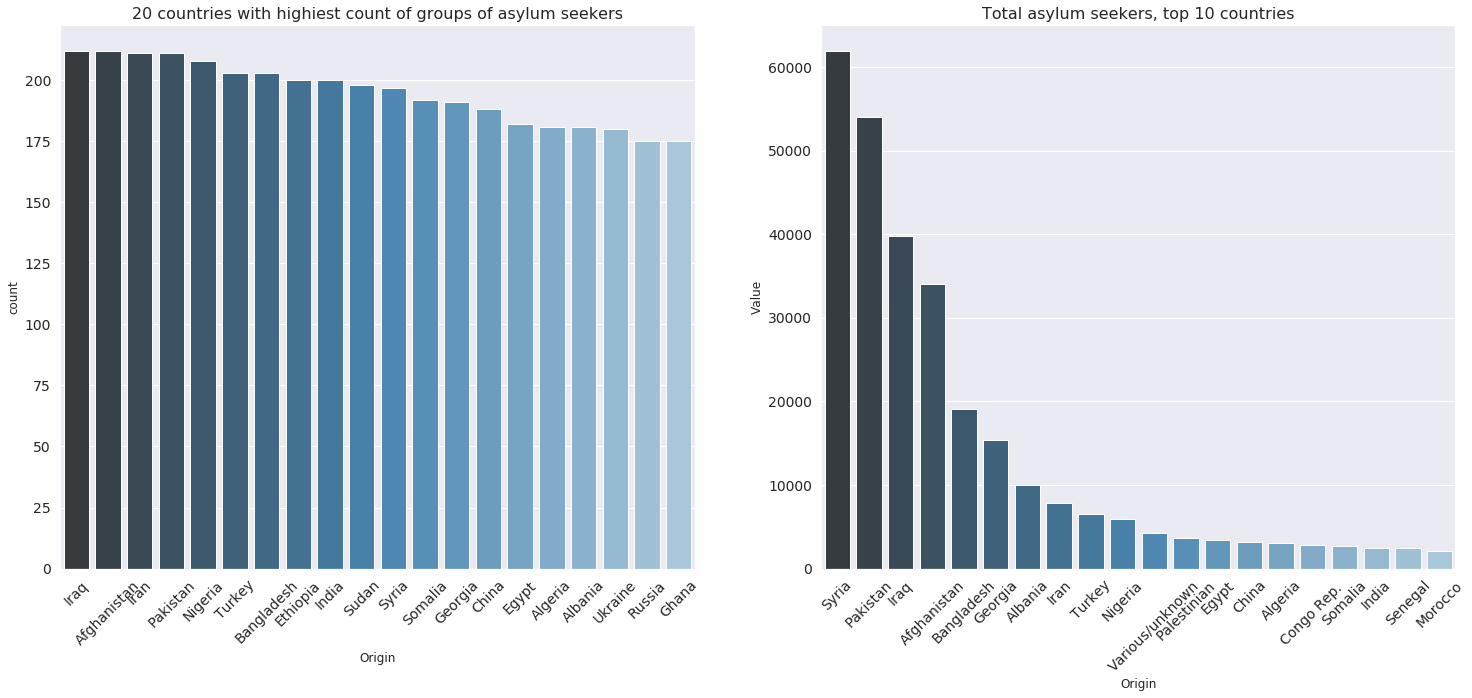

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data['Origin'],order=pd.value_counts(data['Origin']).iloc[:20].index,palette="Blues_d",ax=axs[0])
sns.barplot(x=total_values[0:20].index,y=total_values['Value'][0:20],palette="Blues_d",ax=axs[1])
axs[0].set_title('20 countries with highiest count of groups of asylum seekers',fontsize=16 )
axs[1].set_title('Total asylum seekers, top 10 countries',fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(size=14,rotation=45)
    plt.yticks(size=14,)
plt.show()

Lets see the same information in pie charts

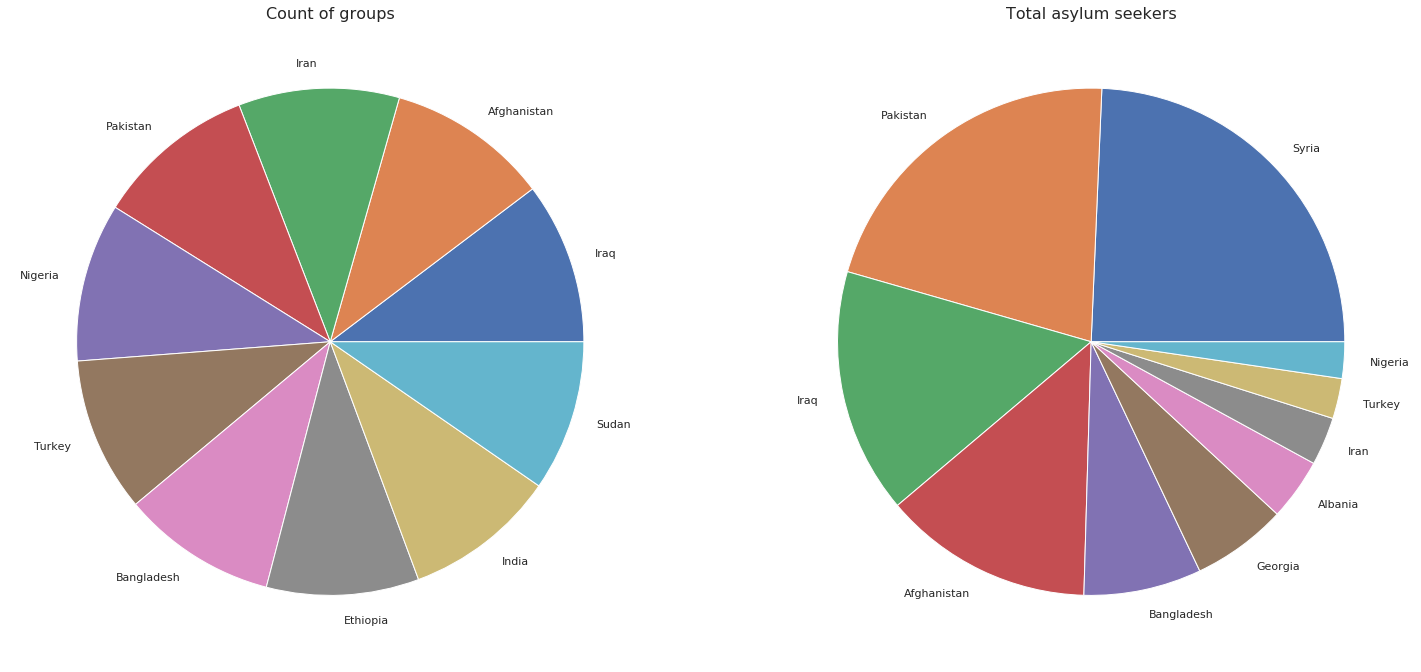

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(25, 15))
data['Origin'].value_counts()[:10].plot(kind='pie',ax=axs[0])
data.Value.groupby(data.Origin).sum().sort_values(ascending=False)[:10].plot(kind='pie',ax=axs[1])
axs[0].set_title('Count of groups',fontsize=16)
axs[0].set_ylabel('')
axs[1].set_title('Total asylum seekers',fontsize=16)
axs[1].set_ylabel('')
plt.show()

So even though almost the same number of groups came from certain countries throughout these 19 years, the groups of these countries contained significantly different amount of people.
For example Nigeria has almost the same number of groups with Afganistan but also has amost 6 times smaller amount of total people.
In general, the number of groups is pretty similar between the top countries but the number of people in each group varies a lot for each country.


<a id="spatial"></a>
<h3><b>Geographical plots</b></h3>

Lets visualize these data in geographical maps for a better perspective.


In [15]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['centroid_col']=world.centroid
origin_counts=data['Origin'].value_counts()
top_origin_counts=origin_counts.nlargest(10)
top_countries=world[world['name'].isin(list(top_origin_counts.keys()))]


In [16]:
all_countries=world.loc[world['name'].isin(list(data['Origin']))]
all_countries.reset_index(drop=True, inplace=True)
all_countries.set_index('name',inplace=True)
for country in all_countries.index:
    all_countries.loc[country,'sum']=total_values.loc[country].values[0]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


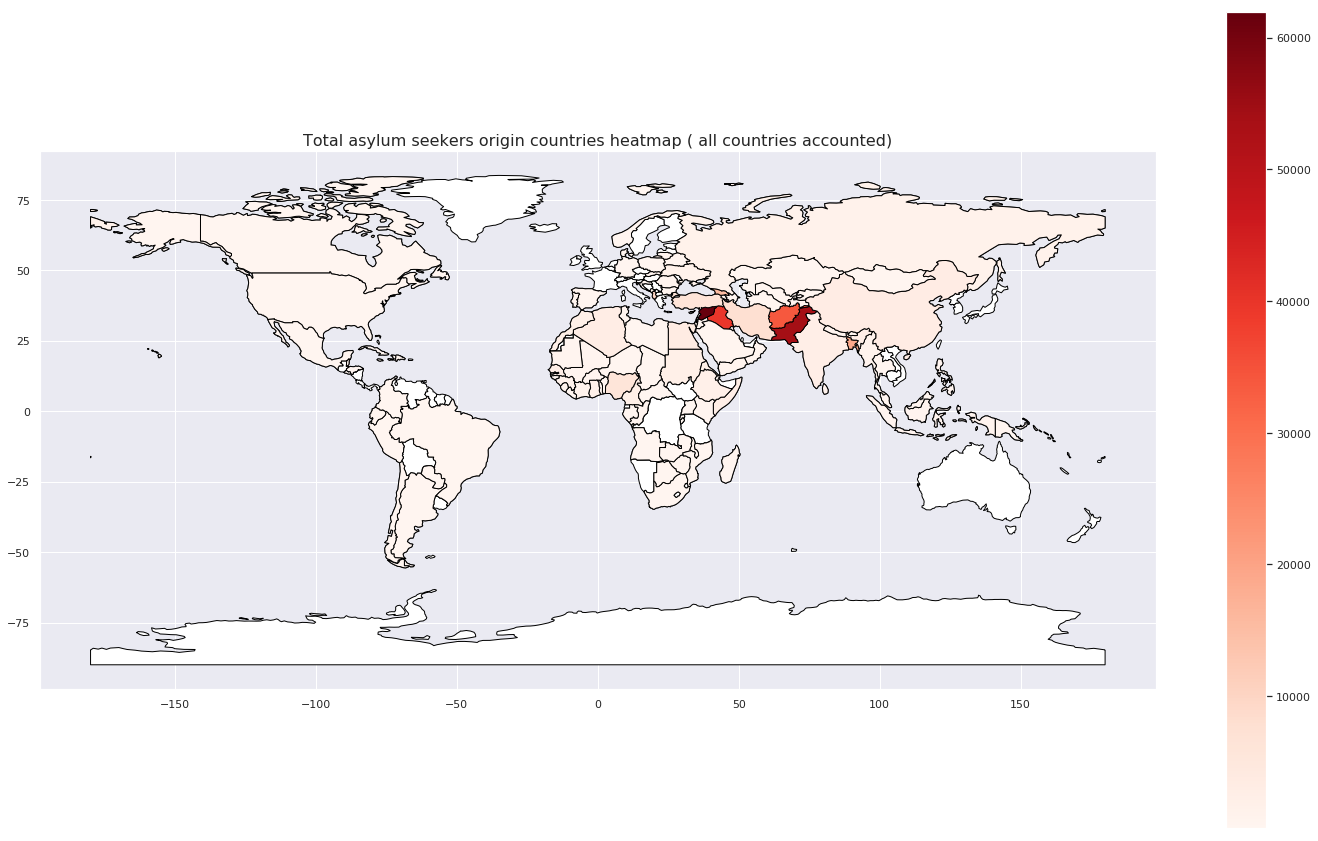

In [17]:
fig, ax = plt.subplots(figsize=(25,15))
plt.title('Total asylum seekers origin countries heatmap ( all countries accounted)',fontsize=16)
world.plot(ax=ax, color='white', edgecolor='black')
all_countries.plot(column='sum',legend='True',ax=ax, edgecolor='black',cmap='Reds')
plt.show()

In [18]:
top_countries=world[world['name'].isin(list(origin_counts.nlargest(20).keys()))]


In [19]:

map=folium.Map([37.993670, 23.731474], zoom_start=3)
folium.Marker([37.993670, 23.731474], popup='<i>Greece</i>',icon=folium.Icon(color='green', icon='home')).add_to(map)

for index, row in all_countries.iterrows():
   folium.Circle(
      location=[row['centroid_col'].y,row['centroid_col'].x],
      tooltip=row.name,
      popup=row['sum'],
      radius=row['sum']*12,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map)
map

Now lets check how the total sum of asylum seekers changed over the years.
In the following graph, the impact of the refugee crisis which started at 2014 is obvious.

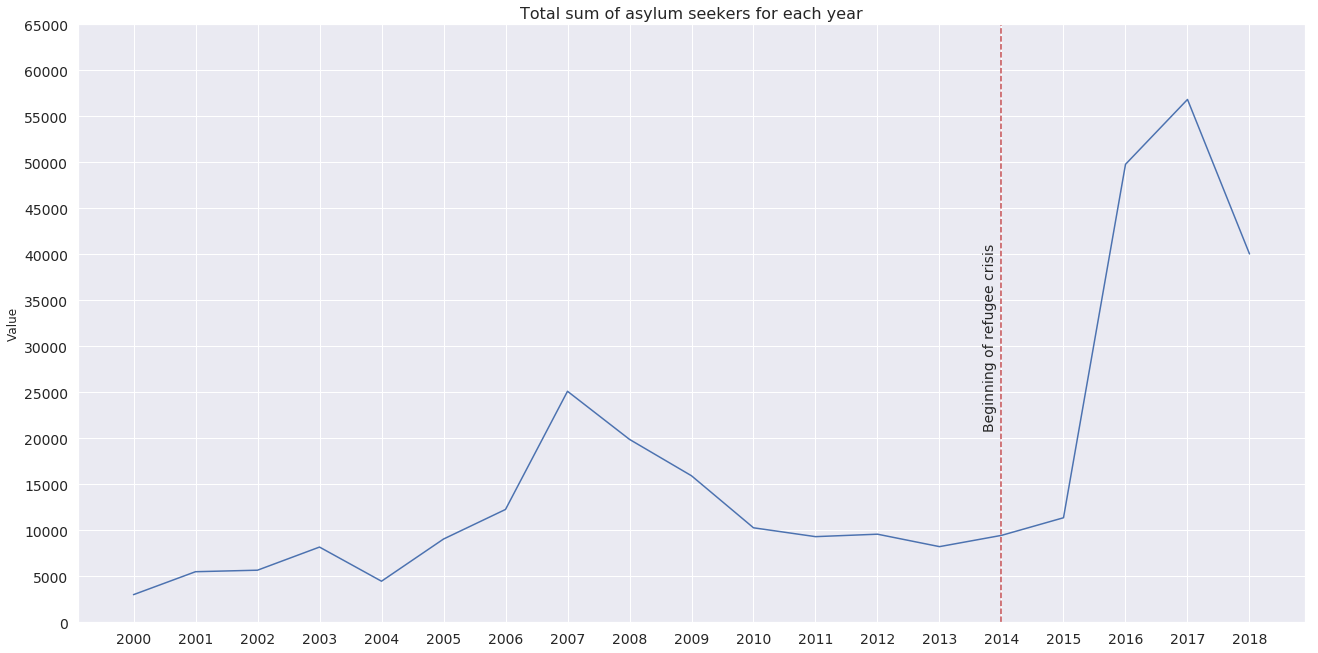

In [20]:
plt.figure(figsize=(22,11))
sns.lineplot(np.arange(2000,2019,1),data.groupby('Year').sum()['Value'])
plt.grid()
plt.xticks(np.arange(2000,2019,1),fontsize=14)
plt.yticks(np.arange(0,70000,5000),fontsize=14)
plt.title('Total sum of asylum seekers for each year',fontsize=16)
plt.axvline(x=2014,color='r',linestyle='--')
plt.text(2013.7,40000,'Beginning of refugee crisis',rotation=90,fontsize=14)
plt.grid()
plt.show()

Lets see the same data splitted for each month.

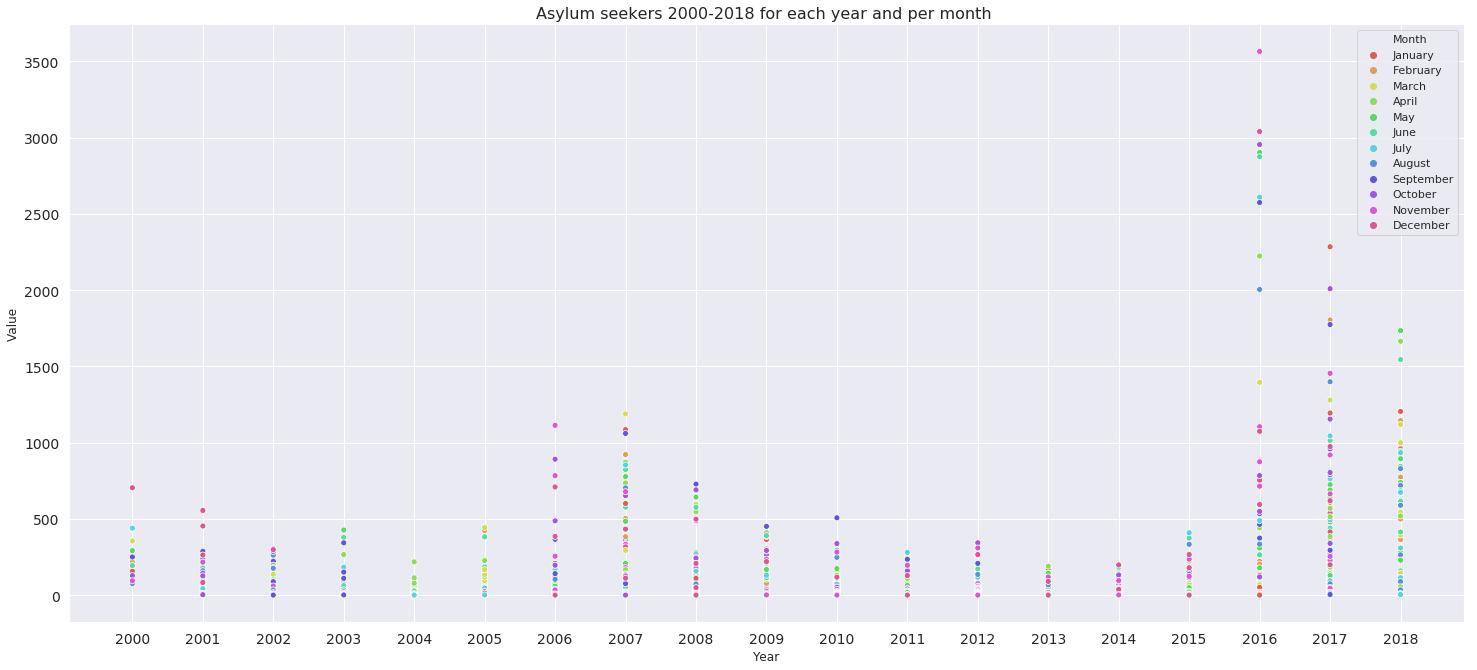

In [21]:
plt.figure(figsize=(25,11))
order=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.scatterplot(data.Year,data.Value,hue=data.Month,hue_order=order,palette=sns.color_palette("hls", 12))
plt.xticks(np.arange(2000,2019,1),fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)
plt.title('Asylum seekers 2000-2018 for each year and per month ',fontsize=16)
plt.show()


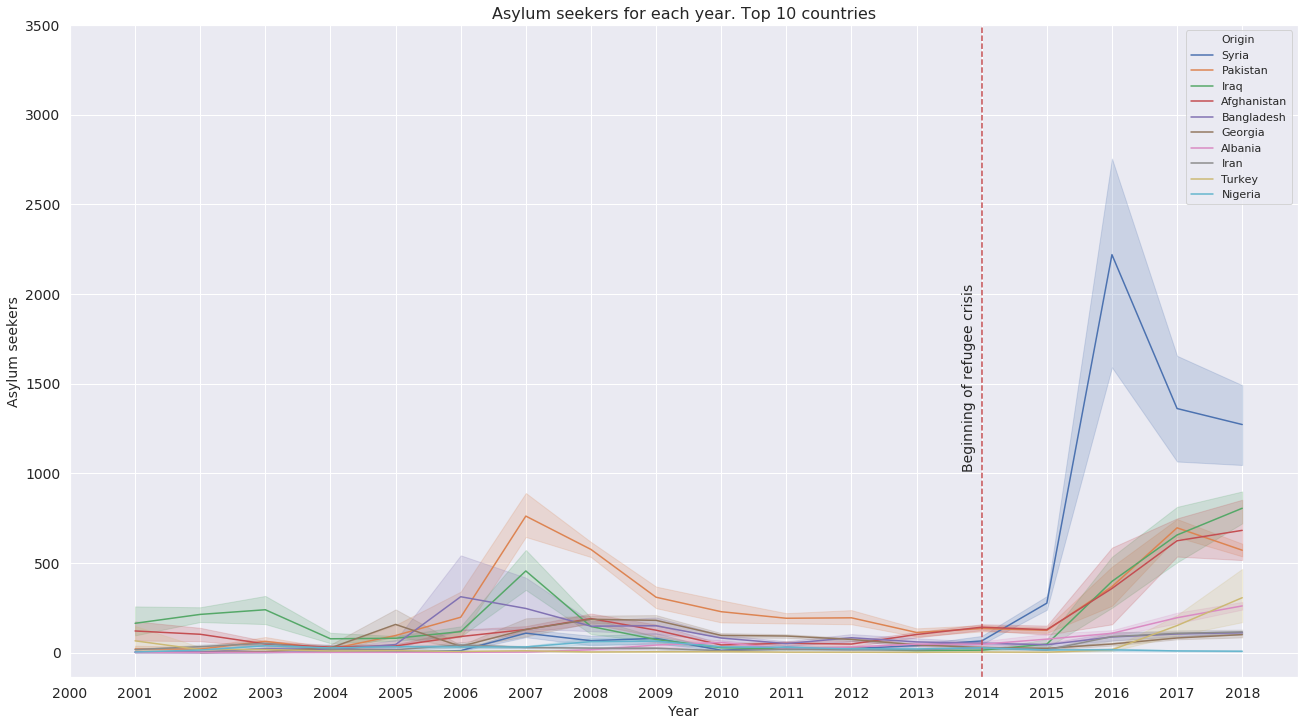

In [22]:
top_data=data[data.Origin.isin(total_values[:10].index)]
plt.figure(figsize=(22,12))
plt.title('Asylum seekers for each year. Top 10 countries',fontsize=16)
sns.lineplot(top_data.Year,top_data.Value,hue=top_data.Origin,hue_order=total_values[:10].index)
plt.xticks(np.arange(2000,2019,1),fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Asylum seekers',fontsize=14)
plt.axvline(x=2014,color='r',linestyle='--')
plt.text(2013.7,2000,'Beginning of refugee crisis',rotation=90,fontsize=14)
plt.show()

* We can clearly see the high rate of increase of Syrian asylum seekers after 2014.
* Also, there are some indications that groups of countries have similar patterns. For example, from 2015 to 2017 we see that Pakistan,Iraq and Afghanistan have very similar behaviour. So additionaly lets make the same graph only for these three countries to see if it'll support our indications.

In [23]:
group1=data[data['Origin'].isin(['Afghanistan','Pakistan','Iraq'])]


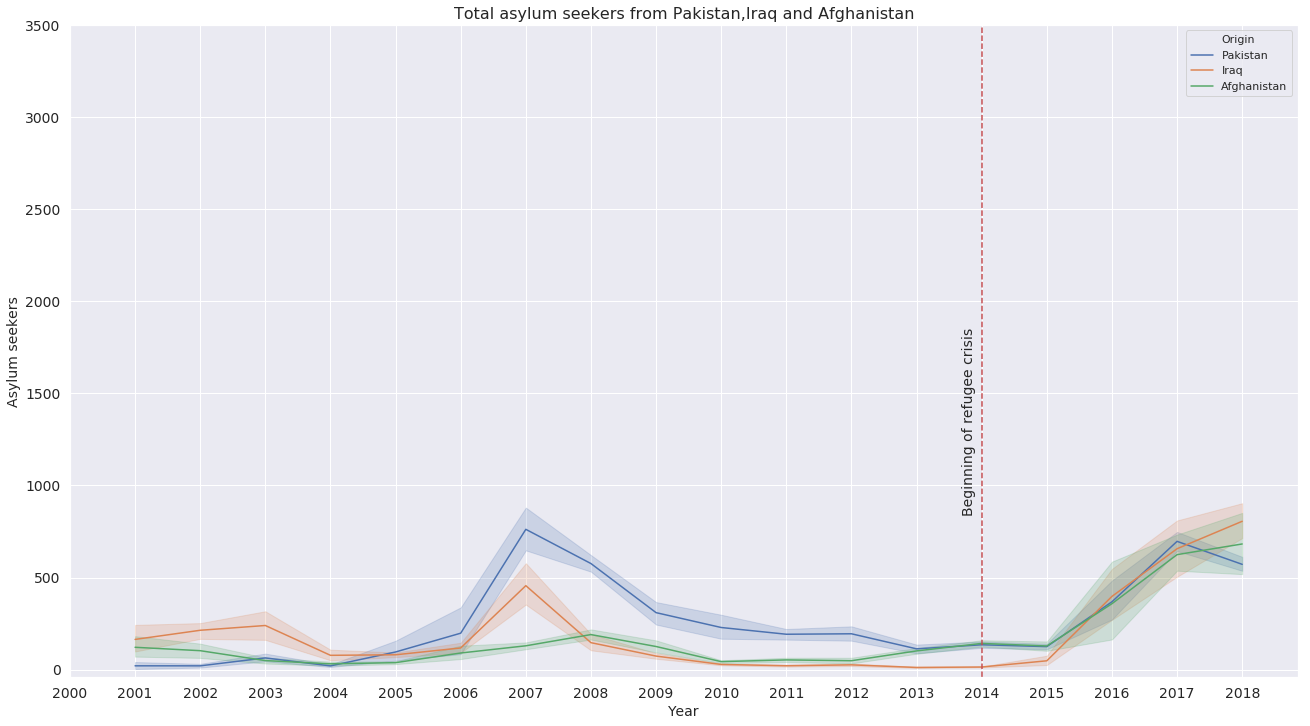

In [24]:
plt.figure(figsize=(22,12))
plt.title('Total asylum seekers from Pakistan,Iraq and Afghanistan',fontsize=16)
sns.lineplot(group1.Year,group1.Value,hue=group1.Origin,hue_order=['Pakistan','Iraq','Afghanistan'])
plt.xlabel('Year',fontsize=14)
plt.ylabel('Asylum seekers',fontsize=14)
plt.xticks(np.arange(2000,2019,1),fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)

plt.axvline(x=2014,color='r',linestyle='--')
plt.text(2013.7,1800,'Beginning of refugee crisis',rotation=90,fontsize=14)
plt.show()

These three countries indeed seem to have many similarities. 

<a id='before'></a>

<h3><b>Before and after the refugee crisis</b></h3>

<a name="more"></a>
Next, we will split the data into two categories, one for the data **before** the crisis of 2014 and another for the data **after** 2014.



In [25]:
data['period']=data['Year']
data.loc[data['Year']<2014,'period']='before'
data.loc[data['Year']>=2014,'period']='after'

data['period']=data['period'].astype('category')
data['period'].cat.reorder_categories(['before', 'after'], inplace=True)
period_sums=data.groupby('period')['Value'].sum()

Now lets see how many asylum seekes where for those two time periods graphicaly 

Asylum seekers groups count:
before    6084
after     2453
Name: period, dtype: int64
------------------------
Total asylum seekers:
period
before    146439
after     167478
Name: Value, dtype: int64


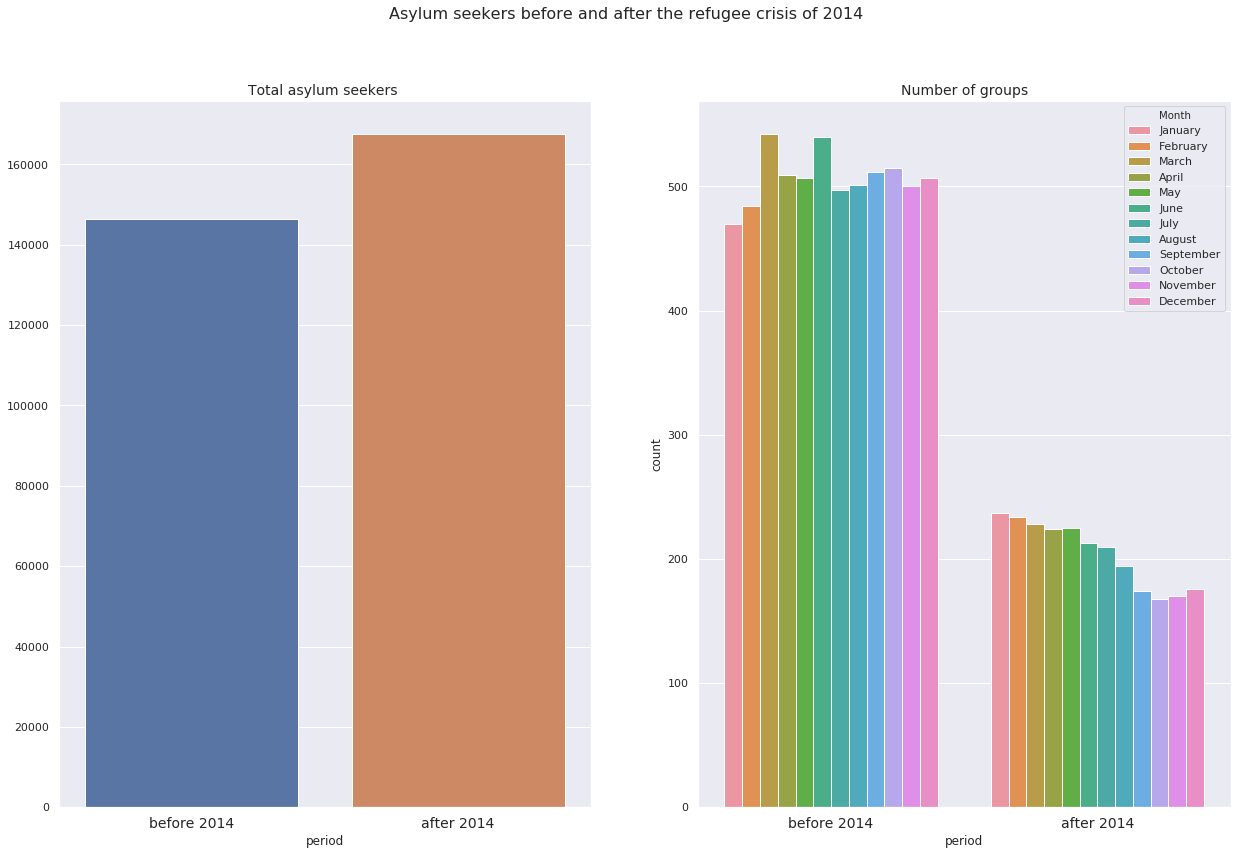

In [26]:
print('Asylum seekers groups count:')
print(data['period'].value_counts())
print('------------------------')
print('Total asylum seekers:')
print(period_sums)

fig, axs = plt.subplots(1, 2, figsize=(21, 13))
sns.barplot(period_sums.index,period_sums.values,ax=axs[0])
plt.suptitle('Asylum seekers before and after the refugee crisis of 2014',fontsize=16)
axs[0].set_title('Total asylum seekers ',fontsize=14)
axs[0].set_xticklabels(['before 2014','after 2014'],fontsize=14)
order=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(data['period'],ax=axs[1],hue=data['Month'],hue_order=order)
axs[1].set_title('Number of groups',fontsize=14)
axs[1].set_xticklabels(['before 2014','after 2014'],fontsize=14)
plt.show()



* First of all, we see that the total sum of asylum seekers after the crisis has increased by an amount of ~12.6%. 
    We should keep in mind that the class 'before' refers to 14 years and the class 'after' to only 5 years. 
    So in 5 years, Greece became the host of more refugees than the total sum of them for the past 14 years.
* In the second graph we clearly see the difference of group counts between the two classes. This is expected since we know that after the crisis, the groups of asylum seekers contained lots of people (sometimes thousands).<br>
   Also, we see that before the crisis of 2014, the monthly count of group arrivals was increasing throughout     the year, having its maximum values at April and June. On the other hand, after the crisis, we see that we have more arrivals in the first season of the year, with maximum values at January     and February and with a decreasing rate.


In [27]:
top_data=data[data['Origin'].isin(total_values[:10].index)]
top_data.reset_index(drop=True, inplace=True)

Lets also see the values of these ten countries before and after 2014.

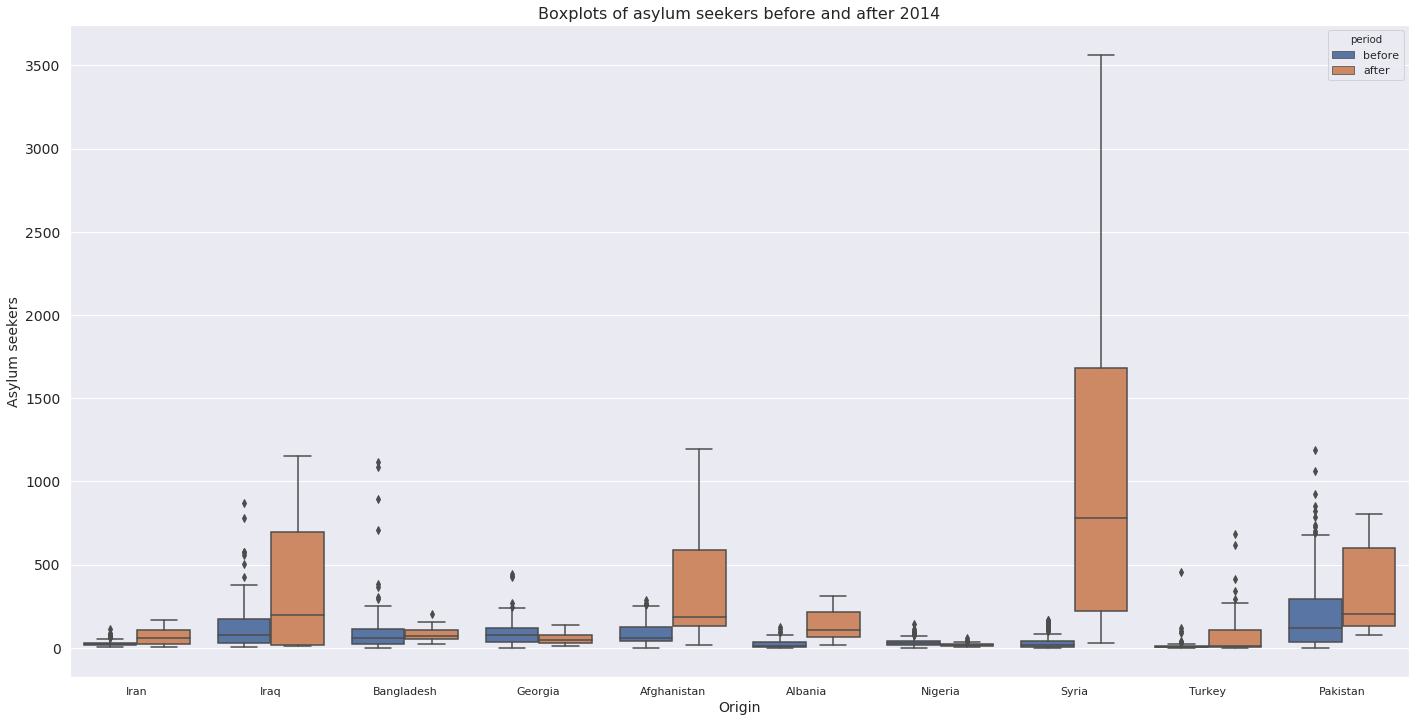

In [28]:
plt.figure(figsize=(24,12))
sns.boxplot(x="Origin",y="Value",hue="period",data=top_data)
plt.title('Boxplots of asylum seekers before and after 2014',fontsize=16)
plt.xlabel('Origin',fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)
plt.ylabel('Asylum seekers',fontsize=14)
plt.show()

Lets also see how the monthly number of Asylum seekers was before and after 2014 in splitted groups.

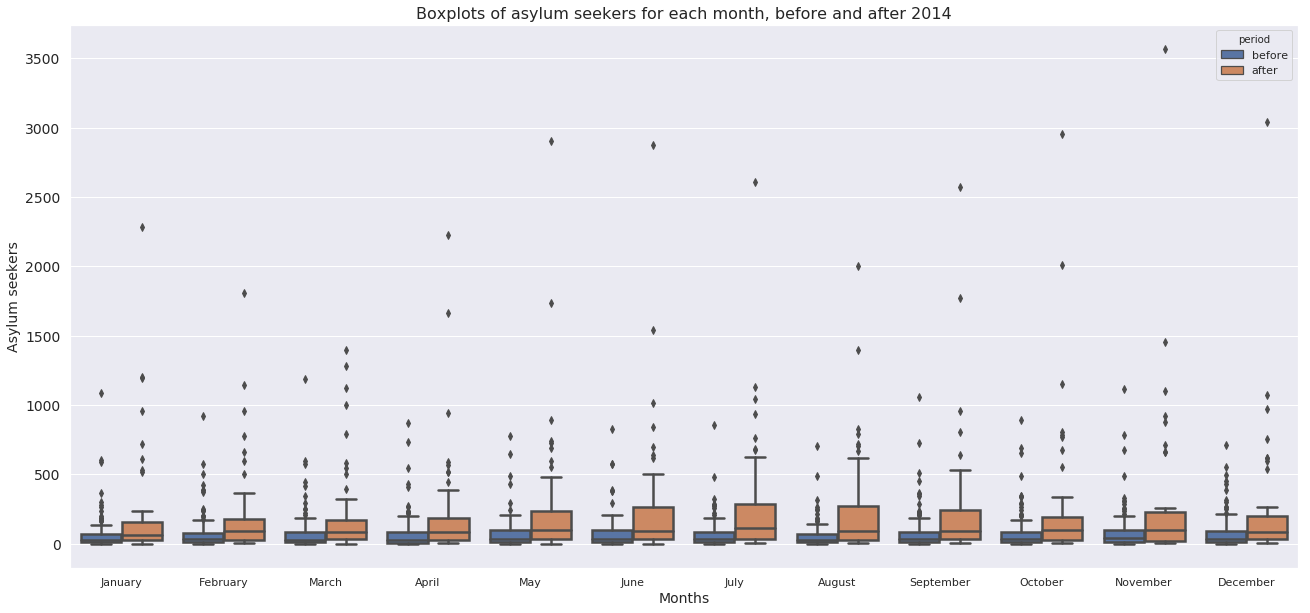

In [29]:
plt.figure(figsize=(22,10))
sns.boxplot(x="Month",y="Value",hue="period",data=top_data,order=order, linewidth=2.5)
plt.title('Boxplots of asylum seekers for each month, before and after 2014',fontsize=16)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Asylum seekers',fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)

plt.show()




**Thanks a lot for your time**